In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import rand_score
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.manifold import MDS
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import scipy.cluster.hierarchy as hier
import plotly.offline as py
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import numpy as np
import random
import colorsys
import math
import skfda
import sys

In [ ]:
!pip install scikit-fda

In [ ]:
!pip install matplotlib==3.6.2

# Data Analysis and Exploration.

The QS World University Rankings 2023 feature over 1,400 universities from around the world, our biggest university ranking yet.  

Institutions are assessed across six categories (or indicators) to effectively capture university performance – including academic and employer reputation, faculty/student ratio and research citations – to help you make the best decision for your future. 


<h1><b>What do the indicators mean?</b></h1>

The six indicators that determine the QS World University Ranking 2023 are: 

**Academic reputation** – Accounting for 40 per cent of the overall score, academic reputation looks at the teaching and research quality at the world’s universities. We collate over 130,000 expert opinions from the higher education space, creating the largest survey of academic opinion in the world.  

**Employer reputation** – We know that students want to graduate with the skills and knowledge required for the employment market. We assess how institutions prepare students for successful careers, and which institutions provide the most competent, innovative, and effective graduates.  

**Faculty/student ratio** – This indicator recognises that a high number of academics per student reduces the teaching burden and creates a more supportive student experience. We assess how institutions provide students with meaningful access to lecturers and tutors.  

**Citations per faculty** – We measure university research quality with a citation per faculty metric, taking the total number of academic citations in papers produced by a university in a five-year period. 

**International student ratio & International faculty ratio** – A highly international university creates a number of benefits. It demonstrates the ability to attract quality students and staff from across the world, and it implies a highly global outlook. Strong international institutions provide a multinational environment, building international sympathies and global awareness. 

**International Research Network (IRN) Index** – IRN Index reflects the ability of institutions to diversify the geography of their international research network by establishing sustainable research partnerships with other higher education institutions. It also reflects the efficiency of this as we look at the diversity of partner locations against the efforts needed to achieve such a diversity.

**Employment Outcomes** – QS appreciates that for many students, a successful career is a primary goal of their university education. We have designed the Employment Outcomes indicator to reflect the ability of institutions to ensure a high level of employability for their graduates, while also nurturing future leaders who go on to make an impact in their respective fields.


<h1><b>Indicator Weights</b></h1>


- Academic Reputation	40%
- Employer Reputation	10%
- Faculty Student Ratio	20%
- Citations per Faculty	20%
- International Faculty Ratio	5%
- International Student Ratio	5%
- International Research Network	0% (for 2023 edition)
- Employment Outcomes	0% (for 2023 edition)


<h1><b>QS Institution Classifications</b></h1>
QS classify institutions across four dimensions for the purposes of rankings comparison. They are listed below.

**Size**

Based on the (full time equivalent) size of the degree-seeking student body. Where an FTE number is not provided or available, one will be estimated based on common characteristics of other institutions in the country or region in question.

- XL	Extra Large	More than 30,000
- L	Large	>=12,000
- M	Medium	>=5,000
- S	Small	Fewer than 5,000


**Subject Range**

Four categories based on the institution’s provision of programs in the five broad faculty areas used in the university rankings. Due to radically different publication habits and patterns in medicine, an additional category is added based on whether the subject institution has a medical school.


- FC	Full comprehensive	All 5 faculty areas + medical school
- CO	Comprehensive	All 5 faculty areas
- FO	Focused	3 or 4 faculty areas
- SP	Specialist	
- 2 or fewer faculty areas

**Age**

- 5	Historic	100 years old and more
- 4	Mature	50-99 years old
- 3	Established	25-49 years old
- 2	Young	10-24 years old
- 1	New	Less than 10 years old


**Research Intensity**

Four levels of research activity evaluated based on the number of documents retrievable from Scopus in the five-year period preceding the application of the classification. The thresholds required to reach the different levels are different depending on the institution's pre-classification on aspects 1 and 2.

- VH	Very High
- HI	High
- MD	Medium
- LO	Low

In [ ]:
# Load the dataset
QS_2023_Dataset = pd.read_excel("2023 QS World University Rankings V2.1 (For qs.com).xlsx")

In [ ]:
QS_2023_Dataset.head()

,2023 QS World University Rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,2023,2022,Institution Name,Location,NaN,Classification,NaN,NaN,NaN,NaN,...,NaN,International Faculty,NaN,International Students,NaN,International Research Network,NaN,Employment Outcomes,NaN,Overall
1,RANK,RANK,NaN,NaN,Location,SIZE,FOCUS,RES.,AGE,STATUS,...,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE,RANK,SCORE
2,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
3,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
4,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8


In [ ]:
QS_2023_Dataset.shape

(1425, 27)

In [ ]:
QS_2023_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   2023 QS World University Rankings  1425 non-null   object
 1   Unnamed: 1                         1301 non-null   object
 2   Unnamed: 2                         1424 non-null   object
 3   Unnamed: 3                         1424 non-null   object
 4   Unnamed: 4                         1424 non-null   object
 5   Unnamed: 5                         1425 non-null   object
 6   Unnamed: 6                         1423 non-null   object
 7   Unnamed: 7                         1419 non-null   object
 8   Unnamed: 8                         1413 non-null   object
 9   Unnamed: 9                         1420 non-null   object
 10  Unnamed: 10                        1425 non-null   object
 11  Unnamed: 11                        1424 non-null   object
 12  Unname

In [ ]:
QS_2023_DataFrame = pd.DataFrame(QS_2023_Dataset.iloc[3:, :])
QS_2023_DataFrame.head()

,2023 QS World University Rankings,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
3,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
4,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8
5,3,3=,Stanford University,US,United States,L,FC,VH,5,B,...,9,99.8,74,60.3,235,96.3,55,100,2,98.5
6,4,2,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,64,98.8,101,98.4,54,99.9,3,100,7,98.4
7,5,5,Harvard University,US,United States,L,FC,VH,5,B,...,2,76.9,228,66.9,212,100,1,100,1,97.6


As we can see from the first five rows of the dataset, the columns and indexes are incorrect. For example, the index of the first row is the number 3 which is incorrect. Also, the first column is the title of the dataset and the other columns are named "Unnamed". We will rename the indexes and columns.

In [ ]:
# Rename the indexes ====================================

print(f'Initial length of DataFrame indexes: {len(QS_2023_DataFrame.index)}\n'
        f'Last initial DataFrame index: {QS_2023_DataFrame.index[-1]}\n'
        f'First initial DataFrame index: {QS_2023_DataFrame.index[0]}')

new_DataFrame_indexes = range(1,len(QS_2023_DataFrame.index)+1)
new_DataFrame_index_dict = {}
for i in range(len(QS_2023_DataFrame.index)):
  new_DataFrame_index_dict[QS_2023_DataFrame.index[i]] = new_DataFrame_indexes[i]

print(f'\nNew length of DataFrame indexes: {len(new_DataFrame_index_dict)}\n'
      f'Last new DataFrame index: {new_DataFrame_index_dict[QS_2023_DataFrame.index[-1]]}\n'
      f'First new DataFrame index: {new_DataFrame_index_dict[QS_2023_DataFrame.index[0]]}\n')

QS_2023_DataFrame = QS_2023_DataFrame.rename(new_DataFrame_index_dict, axis='index')

# Rename the columns ====================================

new_DataFrame_columns = QS_2023_Dataset.iloc[2].iloc[:]
new_DataFrame_columns_dict = {}

for i in range(len(QS_2023_Dataset.columns)):
  new_DataFrame_columns_dict[QS_2023_Dataset.columns[i]] = new_DataFrame_columns[i]


QS_2023_DataFrame = QS_2023_DataFrame.rename(new_DataFrame_columns_dict, axis='columns')

QS_2023_DataFrame

Initial length of DataFrame indexes: 1422
Last initial DataFrame index: 1424
First initial DataFrame index: 3

New length of DataFrame indexes: 1422
Last new DataFrame index: 1422
First new DataFrame index: 1



,rank display,rank display2,institution,location code,location,size,focus,research,age band,status,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
1,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,5,B,...,5,100,54,90,109,96.1,58,100,3,100
2,2,3=,University of Cambridge,UK,United Kingdom,L,FC,VH,5,A,...,55,100,60,96.3,70,99.5,6,100,9,98.8
3,3,3=,Stanford University,US,United States,L,FC,VH,5,B,...,9,99.8,74,60.3,235,96.3,55,100,2,98.5
4,4,2,University of Oxford,UK,United Kingdom,L,FC,VH,5,A,...,64,98.8,101,98.4,54,99.9,3,100,7,98.4
5,5,5,Harvard University,US,United States,L,FC,VH,5,B,...,2,76.9,228,66.9,212,100,1,100,1,97.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,1401+,1201+,Universidad Nacional Autónoma de Honduras (UNAH),HN,Honduras,XL,FC,LO,5,A,...,601+,1.7,601+,NaN,NaN,8.1,601+,NaN,NaN,-
1419,1401+,1201+,Universidad Tecnológica de Bolívar,CO,Colombia,M,FO,HI,4,B,...,601+,9.3,601+,1.3,601+,8.8,601+,30.9,403,-
1420,1401+,1201+,Université Mohammed V de Rabat,MA,Morocco,XL,CO,VH,3,A,...,601+,5.2,601+,2.8,601+,51.1,601+,NaN,NaN,-
1421,1401+,NaN,University of Craiova,RO,Romania,L,CO,HI,4,A,...,601+,NaN,NaN,NaN,NaN,7.5,601+,8.7,601+,-


In [ ]:
QS_2023_DataFrame.shape

(1422, 27)

In [ ]:
QS_2023_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 1 to 1422
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank display   1422 non-null   object
 1   rank display2  1298 non-null   object
 2   institution    1422 non-null   object
 3   location code  1422 non-null   object
 4   location       1422 non-null   object
 5   size           1422 non-null   object
 6   focus          1421 non-null   object
 7   research       1417 non-null   object
 8   age band       1411 non-null   object
 9   status         1418 non-null   object
 10  ar score       1422 non-null   object
 11  ar rank        1422 non-null   object
 12  er score       1421 non-null   object
 13  er rank        1422 non-null   object
 14  fsr score      1420 non-null   object
 15  fsr rank       1422 non-null   object
 16  cpf score      1417 non-null   object
 17  cpf rank       1422 non-null   object
 18  ifr score      1324 non-null

In [ ]:
# Find out how many null values exist
pd.DataFrame(QS_2023_DataFrame.isnull().sum(), columns=["No. of Missing values"])

,No. of Missing values
rank display,0
rank display2,124
institution,0
location code,0
location,0
size,0
focus,1
research,5
age band,11
status,4


In [ ]:
# Find out the percent of missing values in each column
missing_percent = round(QS_2023_DataFrame.isna().mean() * 100, 1)
pd.DataFrame(missing_percent[missing_percent >= 0], columns=["% of Missing Values"])

,% of Missing Values
rank display,0.0
rank display2,8.7
institution,0.0
location code,0.0
location,0.0
size,0.0
focus,0.1
research,0.4
age band,0.8
status,0.3


In [ ]:
# Find out the institutions with missing values
universities_with_missing_values = {}

# Store the name of the institutions with missing values for each indicator
for QS_2023_DataFrame_Column in list(missing_percent[missing_percent > 0].index[:]):
  universities_with_missing_values[QS_2023_DataFrame_Column] = list(QS_2023_DataFrame[QS_2023_DataFrame[QS_2023_DataFrame_Column].isna()]['institution'])

for key, value in universities_with_missing_values.items():
  print(f'===== {key} =====\n')
  for university in value:
    print(university)
    
  print()


In [ ]:
# Copy the DataFrame to a new DataFrame so we can store it as a CSV file
QS_2023_DataFrame_CSV = QS_2023_DataFrame.copy()

In [ ]:
# Store the DataFrame as a CSV and print some information about it
QS_2023_DataFrame_CSV.to_csv("QS_2023_Dataset.csv",index=False)
QS_2023_DataFrame_CSV = pd.read_csv("QS_2023_Dataset.csv")
QS_2023_DataFrame_CSV.describe()

,age band,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1411.000000,1422.000000,1421.000000,1420.000000,1417.000000,1324.000000,1365.000000,1409.000000,1410.000000
mean,4.008505,20.124684,20.657143,29.997113,24.529358,31.659517,26.545348,49.570121,26.186809
std,0.965320,22.802706,24.027928,28.172207,27.910952,34.170817,30.896854,30.205439,26.201036
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.400000,4.400000,8.200000,3.100000,4.800000,3.300000,21.600000,6.700000
50%,4.000000,10.800000,10.300000,18.250000,11.100000,13.750000,10.800000,47.700000,15.500000
75%,5.000000,23.775000,27.000000,43.500000,39.400000,55.075000,40.500000,77.600000,36.900000
max,5.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# We can see that the data type of some of the indicators has changed
QS_2023_DataFrame_CSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank display   1422 non-null   object 
 1   rank display2  1298 non-null   object 
 2   institution    1422 non-null   object 
 3   location code  1422 non-null   object 
 4   location       1422 non-null   object 
 5   size           1422 non-null   object 
 6   focus          1421 non-null   object 
 7   research       1417 non-null   object 
 8   age band       1411 non-null   float64
 9   status         1418 non-null   object 
 10  ar score       1422 non-null   float64
 11  ar rank        1422 non-null   object 
 12  er score       1421 non-null   float64
 13  er rank        1422 non-null   object 
 14  fsr score      1420 non-null   float64
 15  fsr rank       1422 non-null   object 
 16  cpf score      1417 non-null   float64
 17  cpf rank       1422 non-null   object 
 18  ifr scor

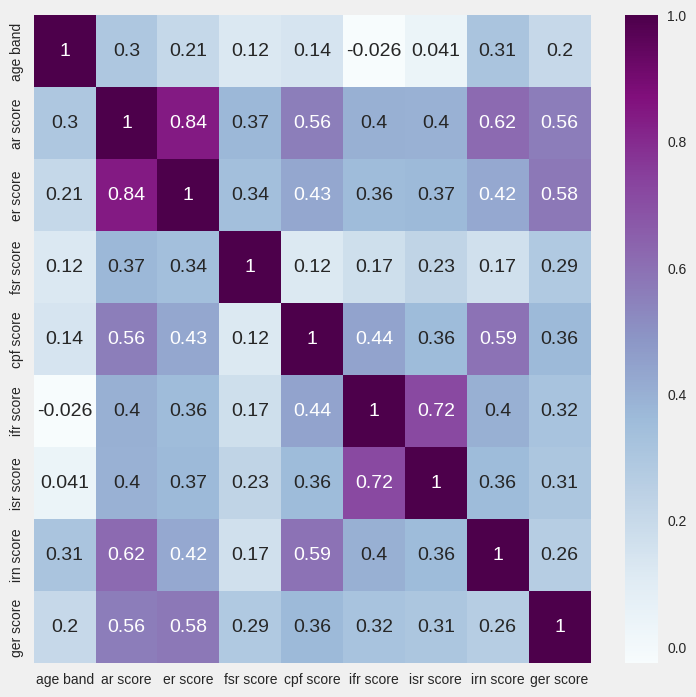

In [ ]:
# Plot correlation heatmap for indicators score columns
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
dataplot = sb.heatmap(QS_2023_DataFrame_CSV.corr(), cmap="BuPu", annot=True)
plt.show()

# Show the sizes of the institutions.

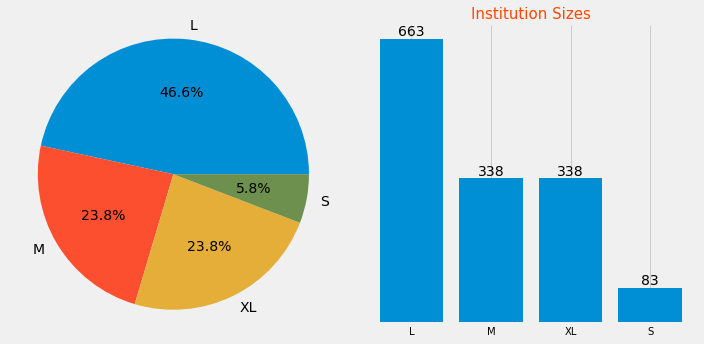

In [ ]:
# What are the sizes of the institutions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(QS_2023_DataFrame[:]['size'].value_counts().values, labels = QS_2023_DataFrame[:]['size'].value_counts().index, autopct='%1.1f%%') 
ax1.axis('equal')


ax2.bar(QS_2023_DataFrame[:]['size'].value_counts().index, QS_2023_DataFrame[:]['size'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Sizes", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()


# Show the research degree(Very High, High, Medium, Low) of the institutions.

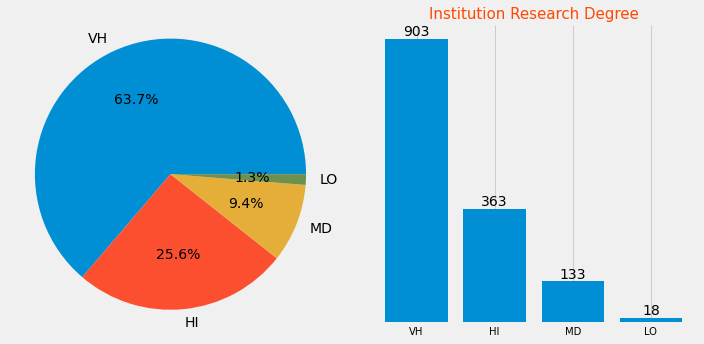

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(QS_2023_DataFrame[:]['research'].value_counts().values, labels = QS_2023_DataFrame[:]['research'].value_counts().index, autopct='%1.1f%%') 
ax1.axis('equal')


ax2.bar(QS_2023_DataFrame[:]['research'].value_counts().index, QS_2023_DataFrame[:]['research'].value_counts().values)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='both', which='both', labelsize=10, left=False, bottom=False)
ax2.get_yaxis().set_visible(False)
plt.title("Institution Research Degree", fontsize=15, color = '#ff4800');

ax2.bar_label(ax2.containers[0])
fig.tight_layout()

In [ ]:
QS_2023_DataFrame.location.value_counts().index

# Show the distribution of institutions across countries.

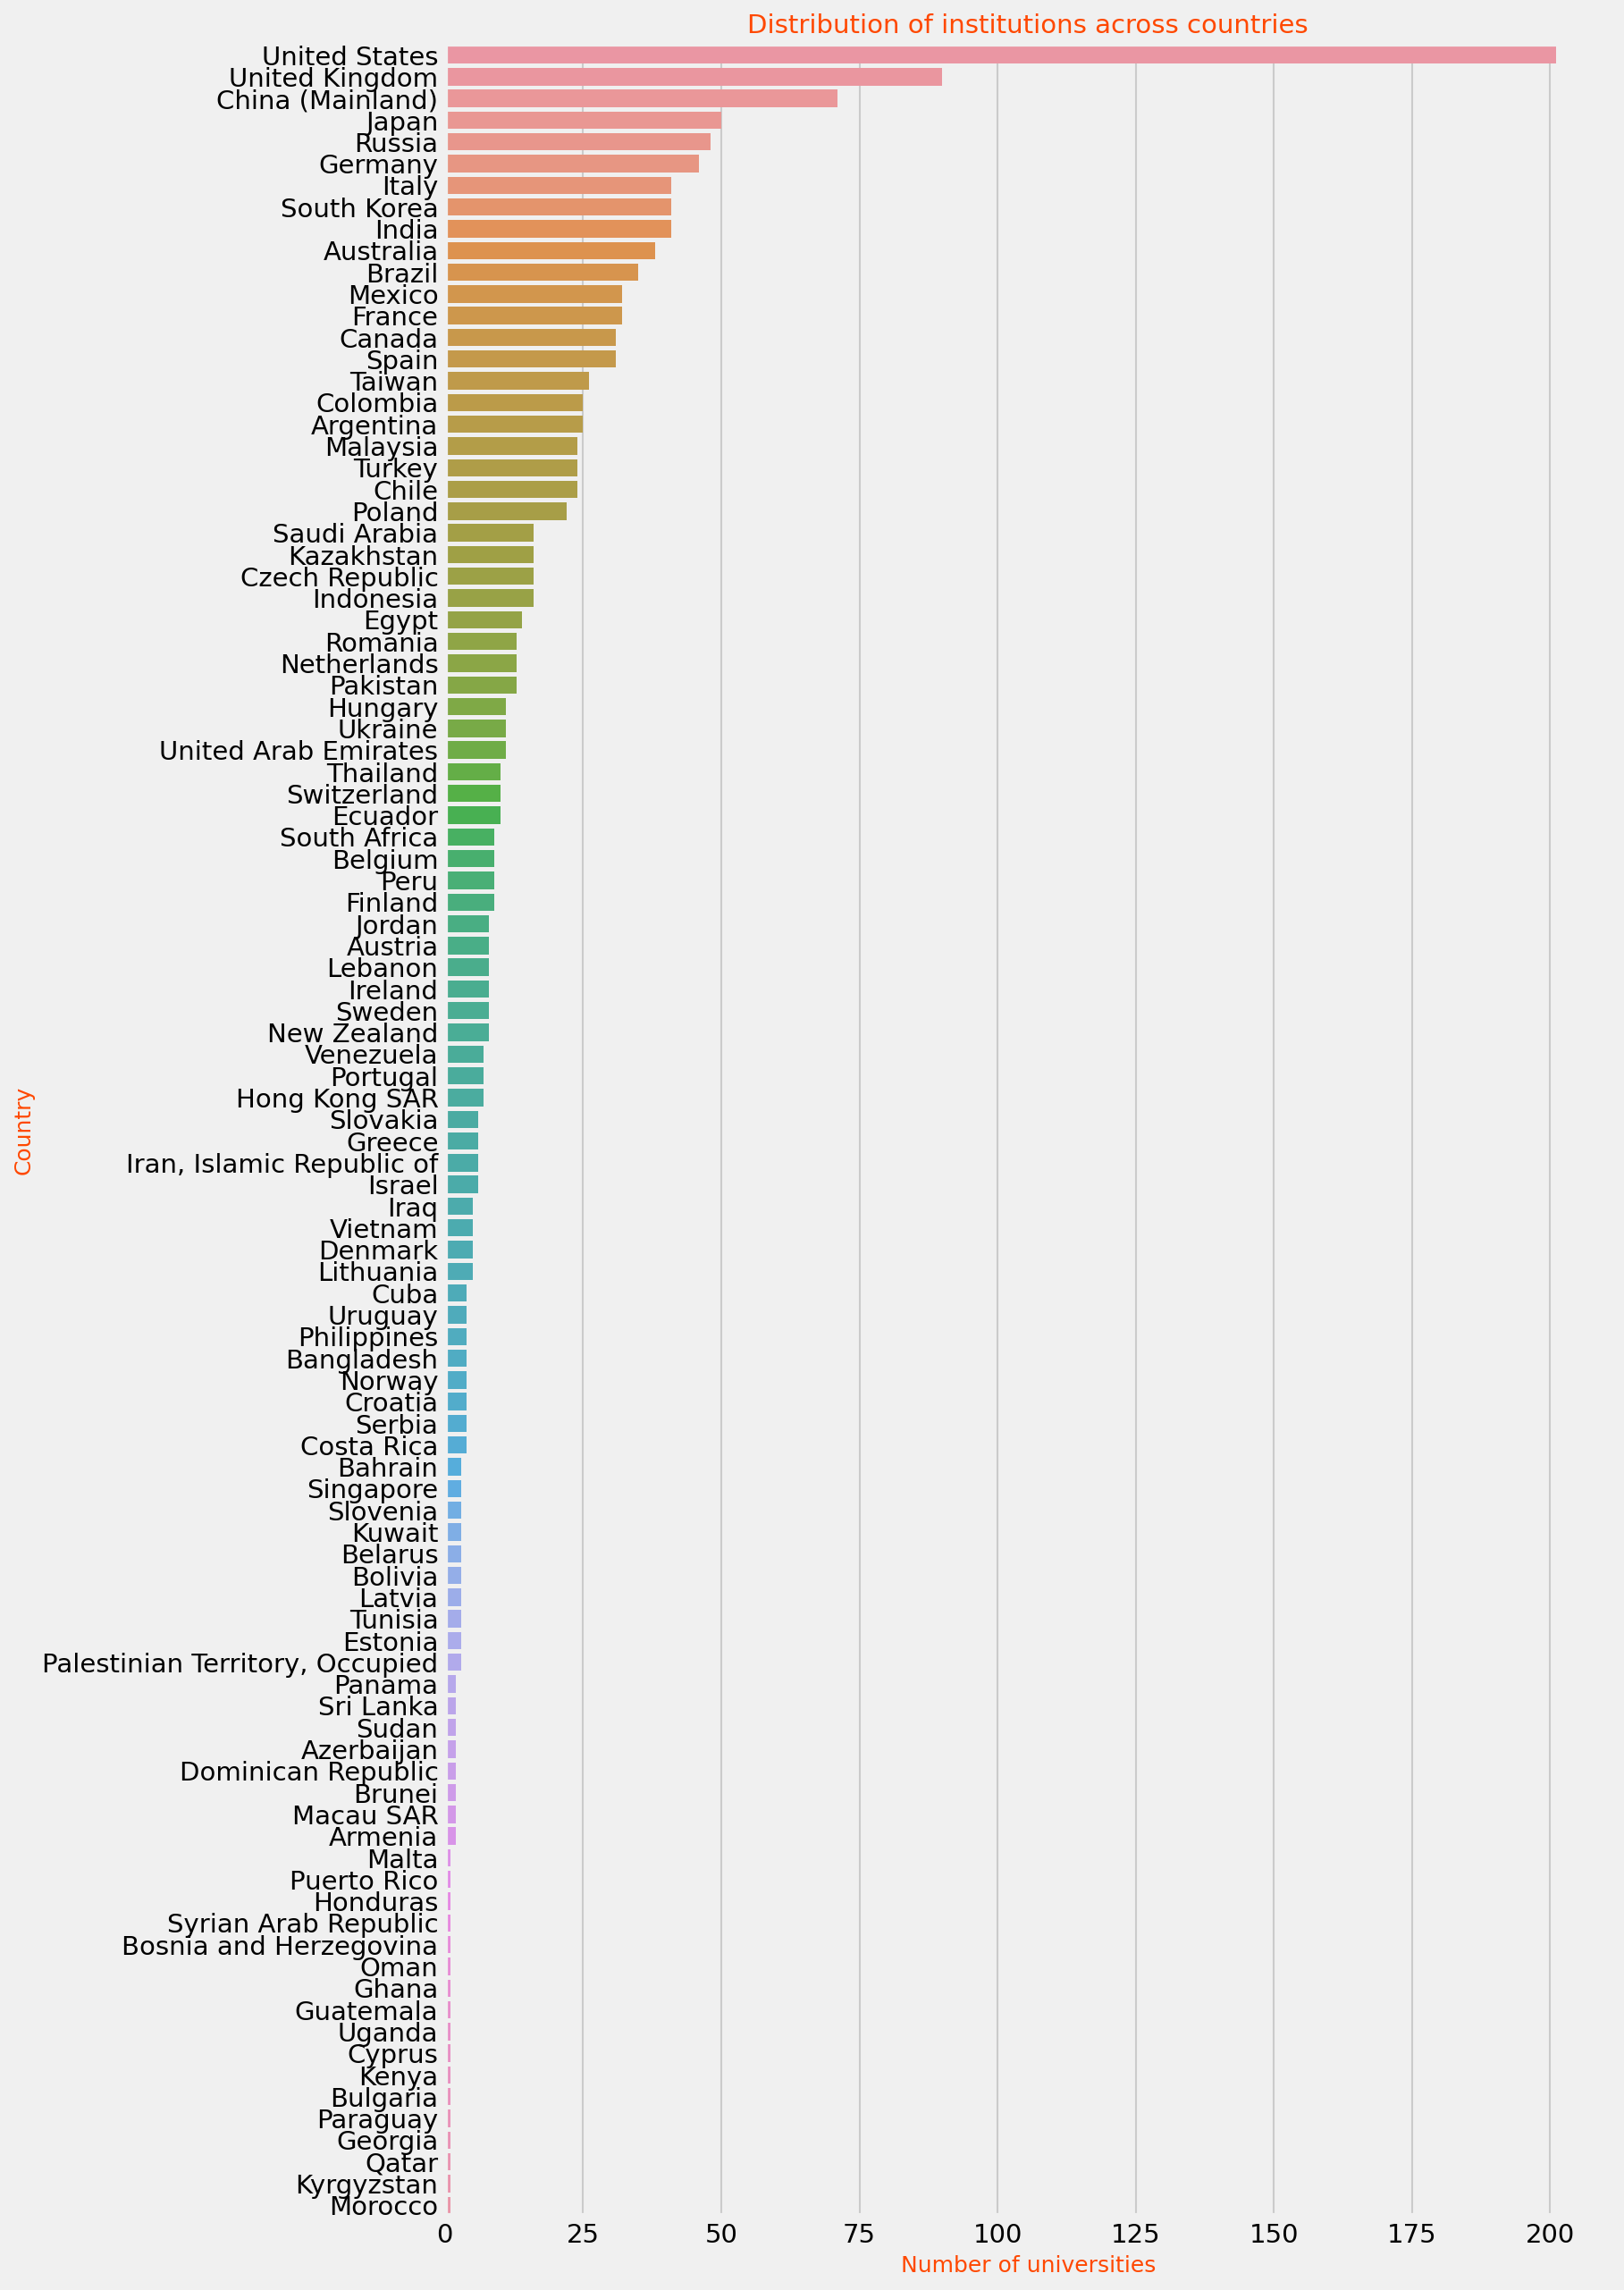

In [ ]:
fig, ax = plt.subplots(figsize=(10,20), dpi=150)

sb.countplot(data=QS_2023_DataFrame, y='location', order=QS_2023_DataFrame.location.value_counts().index)
plt.xlabel('Number of universities', fontsize=12, color = '#ff4800')
plt.ylabel('Country', fontsize=12, color = '#ff4800')
plt.title("Distribution of institutions across countries", fontsize=14, color = '#ff4800');

# What are the top 20 institutions for each of the 8 indicators

1.   Academic Reputation
2.   Employer Reputaion
3.   Faculty/Student Ratio
4.   Employer Outcome
5.   International Faculty 
6.   International Students
7.   International Research Network
8.   Citations Per Facility





We will be using the rank indicator feature of the QS dataset. The data type of these features is string. Some strings can be converted to float but others have a '+' added to them e.g 501+, 601+. Those values will be converted to NaN, but that will not be a problem because we will select the top 20 institutions, for which their values can be converted to float.

In [ ]:

QS_2023_DataFrame_CSV['ar rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['ar rank'], errors='coerce')
QS_2023_DataFrame_CSV['er rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['er rank'], errors='coerce')
QS_2023_DataFrame_CSV['fsr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['fsr rank'], errors='coerce')
QS_2023_DataFrame_CSV['cpf rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['ifr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['ifr rank'], errors='coerce')
QS_2023_DataFrame_CSV['isr rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['irn rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')
QS_2023_DataFrame_CSV['ger rank'] = pd.to_numeric(QS_2023_DataFrame_CSV['cpf rank'], errors='coerce')

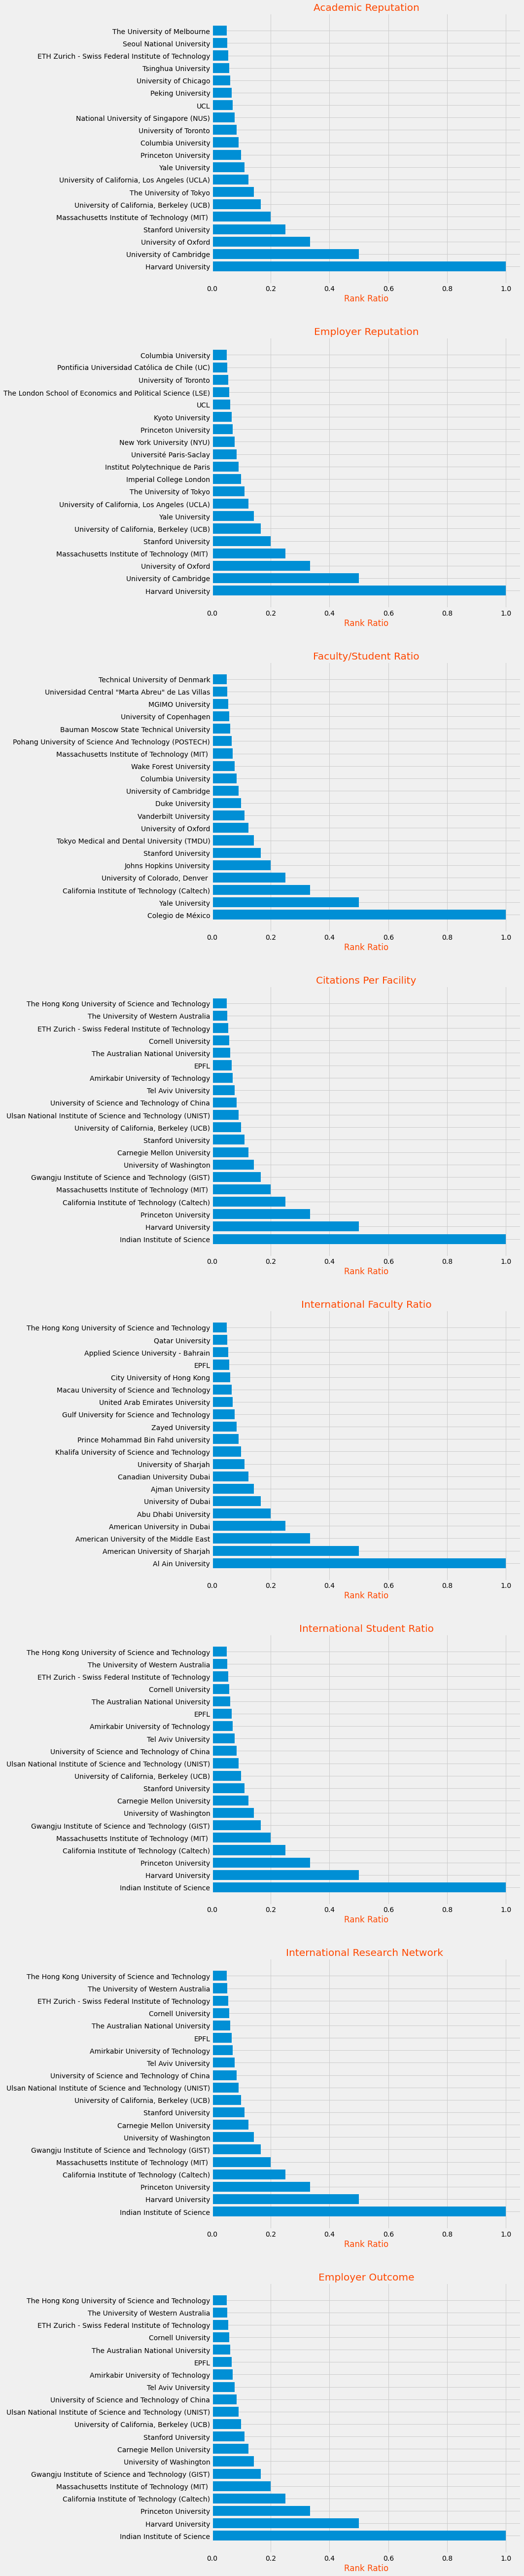

In [ ]:
def plot_rank(title, column, subplot_index):
  axes[subplot_index].barh( QS_2023_DataFrame_CSV.sort_values(by=[column])['institution'].head(20).to_numpy(),
          QS_2023_DataFrame_CSV[column].sort_values().head(20).apply(lambda rank: 1.0/rank).to_numpy())

  axes[subplot_index].set_title(title, color = '#ff4800')
  axes[subplot_index].set_xlabel("Rank Ratio", color = '#ff4800')

figure, axes = plt.subplots(8, figsize=(10, 50))
plt.subplots_adjust(top=1.5)


plot_rank("Academic Reputation", 'ar rank', 0)
plot_rank("Employer Reputation", 'er rank', 1)
plot_rank("Faculty/Student Ratio", 'fsr rank', 2)
plot_rank("Citations Per Facility", 'cpf rank', 3)
plot_rank("International Faculty Ratio", 'ifr rank', 4)
plot_rank("International Student Ratio", 'isr rank', 5)
plot_rank("International Research Network ", 'irn rank', 6)
plot_rank("Employer Outcome", 'ger rank', 7)


plt.show()

#Clustering Algorithms

## Clustering Helper Functions and Classes
We will define some functions to help us with clustering visualization and organization.

In [ ]:
# Colors used for each cluster. These colors are unique and bright so that there is a distinction among them.
COLORS = [
'#FF0000',
'#FFFF00',
'#00EAFF',
'#AA00FF',
'#FF7F00',
'#BFFF00',
'#0095FF',
'#FF00AA',
'#FFD400',
'#6AFF00',
'#0040FF',
'#EDB9B9',
'#B9D7ED',
'#E7E9B9',
'#DCB9ED',
'#B9EDE0',
'#8F2323',
'#23628F',
'#8F6A23',
'#6B238F',
'#4F8F23',
'#000000',
'#737373',
'#CCCCCC',
]

In [ ]:
def Cluster_2D_Visualization(data, labels, ordered_clusters, qs_df, cluster_centers=None):

  # For interactive 2D scatter plot with plotly. Add 'qs_df' as a parameter.
  ''' Traces = []
  cluster_index = 1
  sizes = {1.: 'XL', .75: 'L', .5: 'M', .25: 'S'}
  for cluster_number in ordered_clusters.keys():
    x = data[np.where(labels == cluster_number)][:, 0]
    y = data[np.where(labels == cluster_number)][:, 1]
    Traces.append(
        {
          "mode": "markers", 
          "name": f'Cluster: {cluster_index} Size: {len(x)}', 
          "type": "scatter", 
          "text": [qs_df['institution'][inst_index] + ' ' + sizes[qs_df['size'][inst_index]] for inst_index in list(np.where(labels == cluster_number)[0])],
          "x": x,
          "y": y,
          "marker": { 
            "color": f'{COLORS[cluster_number]}'
          }
      }
    )
    cluster_index += 1
    fig = go.Figure(data=go.Data(Traces))
    fig.show(config=dict({'scrollZoom': True})) '''


  # For matplotlib 2D scatter plot. The 'qs_df' parameter is not needed in this case.
  plt.figure(figsize = (20,10))
  u_labels = np.unique(labels)
  cluster_index = 1

  for cluster_number in ordered_clusters.keys():
    x = data[labels == cluster_number,0]
    y = data[labels == cluster_number,1]
    
    plt.scatter(x, y, label = f'Cluster: {cluster_index} Size: {len(x)}', color=COLORS[i], s=100)
    #plt.scatter(cluster_centers[i][0], cluster_centers[i][1], marker='^', color='black', s=150)
    cluster_index += 1
  
  plt.legend()
  plt.show()


In [ ]:
def Cluster_3D_Visualization(data, labels, qs_df, ordered_clusters):

  Traces = []
  cluster_index = 1
  sizes = {1.: 'XL', .75: 'L', .5: 'M', .25: 'S'}
  for cluster_number in ordered_clusters.keys():
    x = data[np.where(labels == cluster_number)][:, 0]
    y = data[np.where(labels == cluster_number)][:, 1]
    z = data[np.where(labels == cluster_number)][:, 2]
    Traces.append(
        {
          "mode": "markers", 
          "name": f'Cluster: {cluster_index} Size: {len(x)}', 
          "type": "scatter3d", 
          "text": [qs_df['institution'][inst_index] + ' ' + sizes[qs_df['size'][inst_index]] for inst_index in list(np.where(labels == cluster_number)[0])],
          "x": x,
          "y": y,
          "z": z,
          "marker": { 
            "color": f'{COLORS[cluster_number]}'
          }
      }
    )
    cluster_index += 1
    fig = go.Figure(data = go.Data(Traces), layout = go.Layout(margin=dict(l=0,r=0), height = 800, width = 800))
    fig.show()

In [ ]:
def Plot_Clusters_Size(labels, number_of_clusters):
  labels_values = np.sort(np.array([(labels == label).sum() for label in range(number_of_clusters)]))
  ax = sb.countplot(labels, order=np.argsort(np.array([(labels == label).sum() for label in range(number_of_clusters)])))
  ax.bar_label(container=ax.containers[0], labels=labels_values)

In [ ]:
def Create_Clusters(labels, number_of_clusters, df):

  # Create clusters for each label and assign the institutions to each cluster
  clusters = [[] for _ in range(number_of_clusters)]

  # Create a custom dataframe to store each institution's cluster number
  dataframe_data = []

  for label_index in range(len(labels)):
    clusters[labels[label_index]].append((
                                          df.iloc[label_index]['institution'], 
                                          df.iloc[label_index]['rank display'], 
                                          df.iloc[label_index]['size'],
                                          df.iloc[label_index]['ar score'],
                                          df.iloc[label_index]['er score'],
                                          df.iloc[label_index]['fsr score'],
                                          df.iloc[label_index]['isr score'],
                                          df.iloc[label_index]['cpf score'],
                                          df.iloc[label_index]['ifr score']
                                          ))
    dataframe_data.append([df.iloc[label_index]['institution'], labels[label_index]])

  return clusters, pd.DataFrame(dataframe_data, columns=['institution', 'cluster'])

In [ ]:
def Print_Clusters(clusters):

  # Print the clusters in descending order
  for cluster_idx in range(len(clusters)):

    print("\n===============================")
    for institution in clusters[cluster_idx]:
      print(f'{institution[0]}    {institution[1]}    {institution[2]}')
    print("===============================")
    

In [ ]:
def Calculate_Cluster_Mean(clusters):

  clusters_mean = {}
  for cluster_indx in range(len(clusters)):

    cluster_mean = 0.0
    for institution in clusters[cluster_indx]:

      institution_mean = 0.0
      for indicator_score in list(institution[2:]):
        institution_mean += indicator_score
      
      cluster_mean += (institution_mean / 7.)

    clusters_mean[cluster_indx] = cluster_mean / len(clusters[cluster_indx])

  keys = list(clusters_mean.keys())
  values = list(clusters_mean.values())
  sorted_value_index = np.argsort(values)
  sorted_clusters_mean = {keys[sorted_value_index[i]]: values[sorted_value_index[i]] for i in range(len(sorted_value_index)-1, 0, -1)}
  return sorted_clusters_mean

   

In [ ]:
def Print_Ordered_Clusters(clusters, clusters_mean, df):
  
  for key, value in clusters_mean.items():

    print(f'\n\nCluster: {key}\nSize: {len(clusters[key])}\nMean: {value}\n===============================')
    for institution in clusters[key]:
      print(f'{institution[0]}'.ljust(100) + f'    {df.index[df["institution"] == institution[0]].tolist()[0]}') # Replace the 'df.index...' with institution[1] for the real rank of the institution.
    print("===============================")

In [ ]:
# Calculate the distance between an institution and a cluster centroid.
def Calculate_IC_Distance(institution, cluster_center):
  IC_distance = 0
  for indicator_index in range(2, len(institution)):
    IC_distance += (institution[indicator_index] - cluster_center[indicator_index-2]) ** 2

  return np.array([math.sqrt(IC_distance)])

In [ ]:
# Calculate the distance between the cluster centroids
def Calculate_CC_Distance(cluster_centers, missing_institution_cluster_center, current_cluster):
  CC_distance = 0
  for indicator_index in range(7):
    CC_distance += (cluster_centers[current_cluster][indicator_index] - cluster_centers[missing_institution_cluster_center][indicator_index]) ** 2

  return CC_distance

In [ ]:
def Find_Outliers(clusters, clusters_mean, df, kmeans_cluster_centers, cluster_df):

  dataframe_index = 0
  data = []
  for key, value in clusters_mean.items():

    print(f'\n\nCluster: {key}\nMean: {value}\n===============================')

    cluster_size = 0
    max_institution_distance = ["", 0.]
    min_institution_distance = ["", sys.float_info.max]
    missing_institution_clusters = []
    institution_index = 0
    while institution_index < len(clusters[key]):  
      current_institution_index = df.index[df["institution"] == clusters[key][institution_index][0]].tolist()[0]
      
      if current_institution_index < dataframe_index:
        
        institution_index += 1

      elif current_institution_index > dataframe_index:

        while current_institution_index > dataframe_index:

          institution_cluster_dist = round(Calculate_IC_Distance(df.iloc[dataframe_index], kmeans_cluster_centers[key])[0], 2)
          missing_institution_cluster = cluster_df.iloc[cluster_df.index[cluster_df['institution'] == df.iloc[dataframe_index][1]].tolist()[0]].tolist()[1]
          cluster_cluster_distance = round(Calculate_CC_Distance(kmeans_cluster_centers, missing_institution_cluster, key), 2)
          
          print(f'{df.iloc[dataframe_index][1]}'.ljust(100) + f'{df.index[df["institution"] == df.iloc[dataframe_index][1]].tolist()[0]} {missing_institution_cluster} {institution_cluster_dist} {cluster_cluster_distance}')
          
          data.append([
                       df.iloc[dataframe_index][1], # Institution
                       df.index[df["institution"] == df.iloc[dataframe_index][1]].tolist()[0], # Rank(based on index)
                       key, # Expected Cluster
                       missing_institution_cluster, # Actual Cluster
                       institution_cluster_dist, # Institution - Expected cluster center distance
                       cluster_cluster_distance # Expected cluster center - Real cluster center distance
                       ])

          if institution_cluster_dist > max_institution_distance[1]:
            max_institution_distance[1] = institution_cluster_dist; max_institution_distance[0] = df.iloc[dataframe_index][1] 
          
          if institution_cluster_dist < min_institution_distance[1]:
            min_institution_distance[1] = institution_cluster_dist; min_institution_distance[0] = df.iloc[dataframe_index][1]

          if missing_institution_cluster not in missing_institution_clusters:
            missing_institution_clusters.append(missing_institution_cluster)

          cluster_size += 1
          dataframe_index += 1
      
      elif current_institution_index == dataframe_index:
        institution_index += 1
        dataframe_index += 1

    print(f'\nSize: {cluster_size}\nMax Distance: {max_institution_distance}\nMin Distance: {min_institution_distance}\nMissing Institution Clusters: {missing_institution_clusters}\n===============================')
    #print(f'The next institution index is : {dataframe_index}')

  return pd.DataFrame(data, columns=[
      "institution",
      "rank",
      "expected cluster",
      "actual cluster",
      "iec distance",
      "ecac distance"
  ])


## DataFrame
Create a DataFrame for clustering algorithms. Original DataFrame contains institutions with missing values on some of the 8 core indicators. We remove the institutions with missing values so that the clustering of the institutions can be unbiased.

- Academic Reputation
- Employer Reputaion 
- Faculty/Student Ratio
- International student ratio & International faculty ratio
- Citations Per Facility


In [ ]:
# Choose the institutions that have none of their 6 indicators score values to null
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV.loc[QS_2023_DataFrame_CSV['institution'].notnull() &
                                                     QS_2023_DataFrame_CSV['rank display'].notnull() &
                                                     QS_2023_DataFrame_CSV['size'].notnull() &
                                                     QS_2023_DataFrame_CSV['ar score'].notnull() & 
                                                     QS_2023_DataFrame_CSV['er score'].notnull() &
                                                     QS_2023_DataFrame_CSV['fsr score'].notnull() &
                                                     QS_2023_DataFrame_CSV['isr score'].notnull() & 
                                                     QS_2023_DataFrame_CSV['cpf score'].notnull() &
                                                     QS_2023_DataFrame_CSV['ifr score'].notnull()]

In [ ]:
# Choose the institutions that have at least one of their 6 indicators score values to null
pd.DataFrame(QS_2023_DataFrame_CSV.loc[QS_2023_DataFrame_CSV['institution'].notnull() &
                                                     QS_2023_DataFrame_CSV['rank display'].notnull() &
                                                     QS_2023_DataFrame_CSV['size'].notnull() &
                                                     QS_2023_DataFrame_CSV['ar score'].isnull() | 
                                                     QS_2023_DataFrame_CSV['er score'].isnull() |
                                                     QS_2023_DataFrame_CSV['fsr score'].isnull() |
                                                     QS_2023_DataFrame_CSV['isr score'].isnull() | 
                                                     QS_2023_DataFrame_CSV['cpf score'].isnull() |
                                                     QS_2023_DataFrame_CSV['ifr score'].isnull()])

In [ ]:
# Drop the unwanted columns from the dataset
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV_CA.drop(['rank display2',
                               'location code',
                               'location',
                               'focus',
                               'research',
                               'age band',
                               'status',
                               'ar rank',
                               'er rank',
                               'fsr rank',
                               'cpf rank',
                               'isr rank',
                               'ifr rank',
                               'irn score',
                               'irn rank',
                               'ger score',
                               'ger rank',
                               'score scaled'], axis=1)

In [ ]:
QS_2023_DataFrame_CSV_CA = QS_2023_DataFrame_CSV_CA.reset_index(drop=True)

We convert the size of the institution from a non-numerical value to a numerical value. We then multiply every indicator by their corresponding weight. 

The Dataframe has no missing values on the 8 core indicators.

In [ ]:
pd.DataFrame(QS_2023_DataFrame_CSV_CA.isnull().sum(), columns=["No. of Missing values"])

In [ ]:
QS_2023_DataFrame_CSV_CA.shape

(1317, 9)

The **MinMaxScaler()** function scales each feature individually so that the values have a given minimum and maximum value, with a default of 0 and 1.

The formula to scale feature values to between 0 and 1 is:

**X(norm) = (X - X(min))/X(max) - X(min)**

Subtract the minimum value from each entry and then divide the result by the range, where range is the difference between the maximum value and the minimum value.

In [ ]:
# Convert size to a numerical value based on the maximum score
for row in range(QS_2023_DataFrame_CSV_CA.shape[0]):

  if QS_2023_DataFrame_CSV_CA['size'][row] == 'S':
    QS_2023_DataFrame_CSV_CA['size'][row] = .25

  elif QS_2023_DataFrame_CSV_CA['size'][row] == 'M':
    QS_2023_DataFrame_CSV_CA['size'][row] = .5

  elif QS_2023_DataFrame_CSV_CA['size'][row] == 'L':
    QS_2023_DataFrame_CSV_CA['size'][row] = .75

  else:
    QS_2023_DataFrame_CSV_CA['size'][row] = 1.

In [ ]:
# Normalize the 6 indicators 
for row in range(QS_2023_DataFrame_CSV_CA.shape[0]):
  QS_2023_DataFrame_CSV_CA['ar score'][row]  =  QS_2023_DataFrame_CSV_CA['ar score'][row]  * 0.4
  QS_2023_DataFrame_CSV_CA['er score'][row]  =  QS_2023_DataFrame_CSV_CA['er score'][row]  * 0.1
  QS_2023_DataFrame_CSV_CA['fsr score'][row] =  QS_2023_DataFrame_CSV_CA['fsr score'][row] * 0.2
  QS_2023_DataFrame_CSV_CA['cpf score'][row] =  QS_2023_DataFrame_CSV_CA['cpf score'][row] * 0.2
  QS_2023_DataFrame_CSV_CA['ifr score'][row] =  QS_2023_DataFrame_CSV_CA['ifr score'][row] * 0.05
  QS_2023_DataFrame_CSV_CA['isr score'][row] =  QS_2023_DataFrame_CSV_CA['isr score'][row] * 0.05


In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(QS_2023_DataFrame_CSV_CA[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']])

MinMaxScaler()

In [ ]:
scaler.data_max_

array([100., 100., 100., 100., 100., 100.])

In [ ]:
QS_2023_DataFrame_CSV_CA[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']] = scaler.transform(QS_2023_DataFrame_CSV_CA[['ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']])

In [ ]:
QS_2023_DataFrame_CSV_CA.head()

,rank display,institution,size,ar score,er score,fsr score,cpf score,ifr score,isr score
0,1,Massachusetts Institute of Technology (MIT),0.50,1.0,1.0,1.000000,1.000000,1.000000,0.898990
1,2,University of Cambridge,0.75,1.0,1.0,1.000000,0.922222,1.000000,0.962626
2,3,Stanford University,0.75,1.0,1.0,1.000000,0.998990,0.997980,0.598990
3,4,University of Oxford,0.75,1.0,1.0,1.000000,0.898990,0.987879,0.983838
4,5,Harvard University,0.75,1.0,1.0,0.993939,1.000000,0.766667,0.665657


In [ ]:
# Convert 'size' type from object to float64                                     
QS_2023_DataFrame_CSV_CA['size'] = QS_2023_DataFrame_CSV_CA['size'].astype('float64')

In [ ]:
# Store the QS_2023_DataFrame_CSV_CA
QS_2023_DataFrame_CSV_CA[['size', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']].to_csv("QS_2023_Dataset_CA.csv", index=False)

In [ ]:
# Store the values of the 7 indicators in a numpy array
Cluster_Data = np.array(QS_2023_DataFrame_CSV_CA[['size', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score']].loc[:].to_numpy())

We need to create additional clusters for the institutions in the QS dataset. Each of these clusters will contain institutions in ranked order without any missing institutions. We will achieve that by dividing the total number of institutions in the dataset "**QS_2023_DataFrame_CSV_CA**" by the number of clusters of our choosing. If the division returns a floating number *x*, we will use the *floor()* function to get the largest integer not greater than *x*. The remaining institutions will be added to the last cluster.

In [ ]:
number_of_clusters = 10
qs_cluster_size = math.floor(QS_2023_DataFrame_CSV_CA.shape[0] / number_of_clusters)
remaining_institutions = 1317 - qs_cluster_size * number_of_clusters

cluster_labels = []
for i in range(number_of_clusters):
  for _ in range(qs_cluster_size):
    cluster_labels.append(i)

for _ in range(remaining_institutions):
  cluster_labels.append(number_of_clusters - 1)


qs_cluster_labels = np.array(cluster_labels, dtype=np.int32)

## Determine the number of clusters

###Elbow Method

In [ ]:
# Apply the elbow method
kmeans_elbow_method = KMeans(init='k-means++', n_init=10, random_state=42)
kmeans_elbow_visualizer = KElbowVisualizer(kmeans_elbow_method, k=(2, 50))

kmeans_elbow_visualizer.fit(Cluster_Data)
kmeans_elbow_visualizer.show()

As we can see, despite the fact that the elbow method gives us a k value of 5, it is not clear what should be the elbow point. Now we will use the Silhouette method.

### Silhouette Score

In [ ]:
# Create an empty dictionary for the Silhouette score
s_score = {} 
# Loop through the number of clusters
for i in range(2,50): # Note that the minimum number of clusters is 2
  # Fit kmeans clustering model for each cluster number
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  # Make prediction
  classes = kmeans.predict(X)
  # Calculate Silhouette score
  s_score[i] = (silhouette_score(X, classes)) 
  # Print the Silhouette score for each cluster number
  print(f'The silhouette score for {i} clusters is {s_score[i]:.3f}')

In [ ]:
# Visualization
plt.figure(figsize=(20,15))
plt.plot(list(s_score.keys()),list(s_score.values()))
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Value')
plt.show()

### Hierarchical Graph

In [ ]:
# Change figure size
plt.figure(figsize=(20,15))
# Fit the heirachical graph
heirachical_graph=hier.dendrogram(hier.linkage(X, method='ward')) #method='ward' uses the Ward variance minimization algorithm
# Add titles and labels
plt.title('Hierachical Clustering Graph')
plt.xlabel('Flowers')
plt.ylabel('Euclidean Distance')

##K-MEANS
Analyze the K-Means clustering algorithm and visualize the results in 2D and 3D.

### KMEANS Visualization and Cluster Analysis for the lloyd algorithm. 

lloyd is a EM-style algorithm.

In [ ]:
# Apply K-Means for the 6 indicators
kmeans_lloyd_original = KMeans(n_clusters=10, init='k-means++', n_init=10)
kmeans_lloyd_original_labels = kmeans_lloyd_original.fit_predict(Cluster_Data)
kmeans_original_lloyd_cluster_means = kmeans_lloyd_original.cluster_centers_

In [ ]:
# Apply K-Means for 2D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_2D = MDS(n_components=2, eps=1e-10)
cluster_kmeans_data_2D = Embedding_2D.fit_transform(Cluster_Data) 

kmeans_2D_labels = kmeans_lloyd_original.fit_predict(cluster_kmeans_data_2D)
kmeans_2D_centers = kmeans_lloyd_original.cluster_centers_

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



In [ ]:
# Apply K-Means for 3D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_3D = MDS(n_components=3)
cluster_kmeans_data_3D = Embedding_3D.fit_transform(Cluster_Data)

kmeans_3D_labels = kmeans_lloyd_original.fit_predict(cluster_kmeans_data_3D)
kmeans_3D_centers = kmeans_lloyd_original.cluster_centers_

In [ ]:
Plot_Clusters_Size(kmeans_lloyd_original_labels, 10)

In [ ]:
kmeans_2D_clusters, _ = Create_Clusters(kmeans_2D_labels, 10, QS_2023_DataFrame_CSV_CA)

ordered_2D_clusters = Calculate_Cluster_Mean(kmeans_2D_clusters)

Cluster_2D_Visualization(cluster_kmeans_data_2D, kmeans_2D_labels, ordered_2D_clusters, QS_2023_DataFrame_CSV_CA, kmeans_2D_centers)

/usr/local/lib/python3.9/dist-packages/plotly/graph_objs/_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [ ]:
Cluster_3D_Visualization(cluster_kmeans_data_3D, kmeans_3D_labels, QS_2023_DataFrame_CSV_CA, 10)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
kmeans_clusters, cluster_dataframe = Create_Clusters(kmeans_lloyd_original_labels, 10, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_clusters = Calculate_Cluster_Mean(kmeans_clusters)

In [ ]:
Print_Ordered_Clusters(kmeans_clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Find the institutions that should belong to a cluster but don't.
Find_Outliers(kmeans_clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA, kmeans_original_lloyd_cluster_means, cluster_dataframe)

### KMEANS Visualization and Cluster Analysis for the elkan algorithm. 

The "elkan" variation can be more efficient on some datasets with well-defined clusters, by using the triangle inequality. However it’s more memory intensive due to the allocation of an extra array of shape (n_samples, n_clusters).

In [ ]:
# Apply K-Means for the 6 indicators
kmeans_elkan_original = KMeans(n_clusters=10, init='k-means++', n_init=10, algorithm="elkan")
kmeans_elkan_original_labels = kmeans_elkan_original.fit_predict(Cluster_Data)
kmeans_elkan_original_cluster_means = kmeans_elkan_original.cluster_centers_

In [ ]:
# Apply K-Means for 2D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_2D = MDS(n_components=2, eps=1e-10)
cluster_kmeans_data_2D = Embedding_2D.fit_transform(Cluster_Data)

kmeans_2D_labels = kmeans_elkan_original.fit_predict(cluster_kmeans_data_2D)
kmeans_2D_centers = kmeans_elkan_original.cluster_centers_

In [ ]:
# Apply K-Means for 3D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_3D = MDS(n_components=3)
cluster_kmeans_data_3D = Embedding_3D.fit_transform(Cluster_Data)

kmeans_3D_labels = kmeans_elkan_original.fit_predict(cluster_kmeans_data_3D)
kmeans_3D_centers = kmeans_elkan_original.cluster_centers_

In [ ]:
Plot_Clusters_Size(kmeans_elkan_original_labels, 10)

In [ ]:
kmeans_2D_clusters, _ = Create_Clusters(kmeans_2D_labels, 10, QS_2023_DataFrame_CSV_CA)

ordered_2D_clusters = Calculate_Cluster_Mean(kmeans_2D_clusters)

Cluster_2D_Visualization(cluster_kmeans_data_2D, kmeans_2D_labels, ordered_2D_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
Cluster_3D_Visualization(cluster_kmeans_data_3D, kmeans_3D_labels, 10)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
kmeans_clusters, cluster_dataframe = Create_Clusters(kmeans_elkan_original_labels, 10, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_clusters = Calculate_Cluster_Mean(kmeans_clusters)

In [ ]:
Print_Ordered_Clusters(kmeans_clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA)



Cluster: 1
Size: 82
Mean: 0.39909560104529607
Massachusetts Institute of Technology (MIT)                                                             0
University of Cambridge                                                                                 1
Stanford University                                                                                     2
University of Oxford                                                                                    3
Harvard University                                                                                      4
California Institute of Technology (Caltech)                                                            5
Imperial College London                                                                                 6
UCL                                                                                                     7
ETH Zurich - Swiss Federal Institute of Technology                                                      

In [ ]:
# Find the institutions that should belong to a cluster but don't.
missing_inst_df = Find_Outliers(kmeans_clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA, kmeans_elkan_original_cluster_means, cluster_dataframe)



Cluster: 1
Mean: 0.39909560104529607
Institut Polytechnique de Paris                                                                     47 5 0.61 0.18
City University of Hong Kong                                                                        53 5 0.53 0.18
Tokyo Institute of Technology (Tokyo Tech)                                                          54 5 0.4 0.18
Brown University                                                                                    62 5 0.5 0.18
The Hong Kong Polytechnic University                                                                65 5 0.29 0.18
Université Paris-Saclay                                                                             68 5 0.4 0.18
Pohang University of Science And Technology (POSTECH)                                               70 6 0.77 0.72
University of Southampton                                                                           77 5 0.41 0.18
Tohoku University                           

In [ ]:
missing_inst_df.head(10)

,institution,rank,expected cluster,actual cluster,iec distance,ecac distance
0,Institut Polytechnique de Paris,47,1,5,0.61,0.18
1,City University of Hong Kong,53,1,5,0.53,0.18
2,Tokyo Institute of Technology (Tokyo Tech),54,1,5,0.40,0.18
3,Brown University,62,1,5,0.50,0.18
4,The Hong Kong Polytechnic University,65,1,5,0.29,0.18
5,Université Paris-Saclay,68,1,5,0.40,0.18
6,Pohang University of Science And Technology (P...,70,1,6,0.77,0.72
7,University of Southampton,77,1,5,0.41,0.18
8,Tohoku University,78,1,5,0.33,0.18
9,University of Zurich,83,1,5,0.39,0.18


## GMM
Analyze the GMM clustering algorithm and visualize the results in 2D and 3D.

In [ ]:
# Apply GMM for the 5 indicators
gmm_original = GaussianMixture(n_components=10, n_init=10, init_params="k-means++")
gmm_original_labels = gmm_original.fit_predict(Cluster_Data)

In [ ]:
# Apply GMM for 2D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_2D = MDS(n_components=2, eps=1e-10)
cluster_data_2D = Embedding_2D.fit_transform(Cluster_Data)

gmm_2D_labels = gmm_original.fit_predict(cluster_data_2D)

In [ ]:
# Apply GMM for 3D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_3D = MDS(n_components=3)
cluster_data_3D = Embedding_3D.fit_transform(Cluster_Data)

gmm_3D_labels = gmm_original.fit_predict(cluster_data_3D)

In [ ]:
Plot_Clusters_Size(gmm_original_labels, 12)

In [ ]:
Cluster_2D_Visualization(cluster_data_2D, gmm_2D_labels, QS_2023_DataFrame_CSV_CA, 12)

In [ ]:
Cluster_3D_Visualization(cluster_data_3D, gmm_3D_labels, 12)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
gmm_clusters, cluster_gmm_dataframe = Create_Clusters(gmm_original_labels, 10, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_gmm_clusters = Calculate_Cluster_Mean(gmm_clusters)

In [ ]:
Print_Ordered_Clusters(gmm_clusters, ordered_gmm_clusters, QS_2023_DataFrame_CSV_CA)



Cluster: 2
Size: 11
Mean: 0.3925909090909091
Massachusetts Institute of Technology (MIT)                                                             0
California Institute of Technology (Caltech)                                                            5
EPFL                                                                                                    15
Princeton University                                                                                    16
Yale University                                                                                         17
Columbia University                                                                                     21
New York University (NYU)                                                                               38
The Hong Kong University of Science and Technology                                                      39
KAIST - Korea Advanced Institute of Science & Technology                                           

## Agglomerative Clustering
Analyze the Agglomerative clustering algorithm and visualize the results.

In [ ]:
# Agglomerative Clustering
agglomerative_clust_original = AgglomerativeClustering(n_clusters=10, distance_threshold=None)

# Fit and predict data
agglomerative_clust_original.fit_predict(Cluster_Data)

# Get labels
agglomerative_labels_original = agglomerative_clust_original.labels_

In [ ]:
# Apply dimensionality reduction using the MDS algorithm
Embedding_2D = MDS(n_components=2, eps=1e-10)
cluster_data_2D = Embedding_2D.fit_transform(Cluster_Data)

ac_labels_2D = agglomerative_clust_original.fit_predict(cluster_data_2D)

In [ ]:
# Apply dimensionality reduction using the MDS algorithm
Embedding_3D = MDS(n_components=3)
cluster_data_3D = Embedding_3D.fit_transform(Cluster_Data)

ac_labels_3D = agglomerative_clust_original.fit_predict(cluster_data_3D)

In [ ]:
Plot_Clusters_Size(agglomerative_labels_original, 10)

In [ ]:
Cluster_2D_Visualization(cluster_data_2D, ac_labels_2D, 10, QS_2023_DataFrame_CSV_CA, -1)

In [ ]:
Cluster_3D_Visualization(cluster_data_3D, ac_labels_3D, 8)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
ac_clusters, cluster_dataframe = Create_Clusters(agglomerative_labels_original, 10, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_ac_clusters = Calculate_Cluster_Mean(ac_clusters)

In [ ]:
Print_Ordered_Clusters(ac_clusters, ordered_ac_clusters, QS_2023_DataFrame_CSV_CA)

## Fuzzy CMeans
Analyze the K-Means clustering algorithm and visualize the results in 2D and 3D.

In [ ]:
# Apply CMeans for the 6 indicators
cmeans_fdata_grid = skfda.FDataGrid(Cluster_Data)
cmeans_original = skfda.ml.clustering.FuzzyCMeans(n_clusters=10, n_init=10)
cmeans_original_labels = cmeans_original.fit_predict(cmeans_fdata_grid)

cmeans_original_cluster_means = cmeans_original.cluster_centers_

# Get a percentage value for each institution for each cluster. This percentage value indicates the probability 
# that an institution belongs to a cluster
cmeans_original_cluster_membership = cmeans_original.membership_degree_ 

In [ ]:
# Apply CMeans for 2D visualization
# Apply dimensionality reduction using the MDS algorithm
Embedding_2D = MDS(n_components=2, eps=1e-10)
cluster_cmeans_data_2D = Embedding_2D.fit_transform(Cluster_Data)
cmeans_fdata_grid_2D = skfda.FDataGrid(cluster_cmeans_data_2D)

cmeans_2D_labels = cmeans_original.fit_predict(cmeans_fdata_grid_2D)
cmeans_2D_centers = cmeans_original.cluster_centers_
cmeans_2D_centers = np.array([[cluster_center.data_matrix[0][0][0], cluster_center.data_matrix[0][1][0]] for cluster_center in cmeans_2D_centers])

In [ ]:
Plot_Clusters_Size(cmeans_original_labels, 10)

In [ ]:
cmeans_2D_clusters, _ = Create_Clusters(cmeans_2D_labels, 10, QS_2023_DataFrame_CSV_CA)

ordered_2D_clusters = Calculate_Cluster_Mean(cmeans_2D_clusters)

Cluster_2D_Visualization(cluster_cmeans_data_2D, cmeans_2D_labels, ordered_2D_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Create the clusters based on the labels and create a new dataframe to store the institution name and cluster id.
cmeans_clusters, cluster_dataframe = Create_Clusters(cmeans_original_labels, 10, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Order the clusters based on the mean value of each institution in the cluster
ordered_clusters = Calculate_Cluster_Mean(cmeans_clusters)

In [ ]:
Print_Ordered_Clusters(cmeans_clusters, ordered_clusters, QS_2023_DataFrame_CSV_CA)

In [ ]:
# Find the institutions that should belong to a cluster but don't.
dataframe_index = 0
for key, value in ordered_clusters.items():

  print(f'\n\nCluster: {key}\nMean: {value}\n===============================')

  cluster_size = 0
  missing_institution_clusters = []
  institution_index = 0
  while institution_index < len(cmeans_clusters[key]):  
    current_institution_index = QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == cmeans_clusters[key][institution_index][0]].tolist()[0]
    
    if current_institution_index < dataframe_index:
      
      institution_index += 1

    elif current_institution_index > dataframe_index:

      while current_institution_index > dataframe_index:

        missing_institution_cluster = cluster_dataframe.iloc[cluster_dataframe.index[cluster_dataframe['institution'] == QS_2023_DataFrame_CSV_CA.iloc[dataframe_index][1]].tolist()[0]].tolist()[1]
        missing_institution_index = QS_2023_DataFrame_CSV_CA.index[QS_2023_DataFrame_CSV_CA["institution"] == QS_2023_DataFrame_CSV_CA.iloc[dataframe_index][1]].tolist()[0] 
        
        print(f'{QS_2023_DataFrame_CSV_CA.iloc[dataframe_index][1]}'.ljust(100) + f'{missing_institution_index} {missing_institution_cluster} {round(cmeans_original_cluster_membership[missing_institution_index][missing_institution_cluster], 3)} {round(cmeans_original_cluster_membership[missing_institution_index][key], 3)}')
        
        if missing_institution_cluster not in missing_institution_clusters:
          missing_institution_clusters.append(missing_institution_cluster)

        cluster_size += 1
        dataframe_index += 1
    
    elif current_institution_index == dataframe_index:
      institution_index += 1
      dataframe_index += 1

  print(f'\nSize: {cluster_size}\nMissing Institution Clusters: {missing_institution_clusters}\n===============================')

## Rand Score
Calculate Rand Score for the K-Means(lloyd, elkan) algorithm, GMM, the Agglomerative Clustering algorithm and the CMeans algorithm.

The **Rand index** is a way to compare the similarity of results between two different clustering methods.

Often denoted R, the Rand Index is calculated as:

***R = (a+b) / (nC2)***

where:

- **a:** The number of times a pair of elements belongs to the same cluster across two clustering methods.
- **b:** The number of times a pair of elements belong to difference clusters across two clustering methods.
- **nC2:** The number of unordered pairs in a set of n elements.

The Rand index always takes on a value between 0 and 1 where:

- 0: Indicates that two clustering methods do not agree on the clustering of any pair of elements.
- 1: Indicates that two clustering methods perfectly agree on the clustering of every pair of elements.

We will calculate the Rand Score for the following algorithms:


1.   KMeans(lloyd)
2.   KMeans(elkan)
3.   GMM(Gaussian Mixture)
4.   Agglomerative Hierarchical Clustering
5.   Fuzzy CMeans



In [ ]:
Rand_Score = [
    # KMeans(lloyd)
    rand_score(kmeans_lloyd_original_labels, kmeans_elkan_original_labels),
    rand_score(kmeans_lloyd_original_labels, gmm_original_labels),
    rand_score(kmeans_lloyd_original_labels, agglomerative_labels_original),
    rand_score(kmeans_lloyd_original_labels, cmeans_original_labels),
    rand_score(kmeans_lloyd_original_labels, qs_cluster_labels),

    # KMeans(elkan)
    rand_score(kmeans_elkan_original_labels, gmm_original_labels),
    rand_score(kmeans_elkan_original_labels, agglomerative_labels_original),
    rand_score(kmeans_elkan_original_labels, cmeans_original_labels),
    rand_score(kmeans_elkan_original_labels, qs_cluster_labels),

    # GMM
    rand_score(gmm_original_labels, agglomerative_labels_original),
    rand_score(gmm_original_labels, cmeans_original_labels),
    rand_score(gmm_original_labels, qs_cluster_labels),

    # Agglomerative Hierar. Clustering
    rand_score(agglomerative_labels_original, cmeans_original_labels),
    rand_score(agglomerative_labels_original, qs_cluster_labels),

    # CMeans
    rand_score(cmeans_original_labels, qs_cluster_labels)
]

In [ ]:
data = {
    "KMeans(lloyd)":    ["1.0", Rand_Score[0], Rand_Score[1], Rand_Score[2], Rand_Score[3], Rand_Score[4]],
    "KMeans(elkan)":    [Rand_Score[0], "1.0", Rand_Score[5], Rand_Score[6], Rand_Score[7], Rand_Score[8]],
    "GMM":              [Rand_Score[1], Rand_Score[5], "1.0", Rand_Score[9], Rand_Score[10], Rand_Score[11]],
    "Agglomerative":    [Rand_Score[2], Rand_Score[6], Rand_Score[9], "1.0", Rand_Score[12], Rand_Score[13]],
    "Fuzzy CMeans":     [Rand_Score[3], Rand_Score[7], Rand_Score[10], Rand_Score[12], "1.0", Rand_Score[14]],
    "QS":               [Rand_Score[4], Rand_Score[8], Rand_Score[11], Rand_Score[13], Rand_Score[14], "1.0"]
}

Rand_Score_DataFrame = pd.DataFrame(data, index=["KMeans(lloyd)", 
                                                 "KMeans(elkan)", 
                                                 "GMM", 
                                                 "Agglomerative", 
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Rand_Score_DataFrame

## Spearman Rank Correlation


Spearman's rank correlation coefficient is a measure of the strength and direction of the association between two variables. It is commonly used to evaluate the similarity between two ranked lists of items. In the context of evaluating clustering algorithms, we can use Spearman's rank correlation coefficient to compare the similarity between the clustering results and a set of ground truth labels. Here are the general steps to apply the Spearman rank correlation coefficient to evaluate clustering algorithms:

1. Obtain a set of ground truth labels for the data set. These labels should 
represent the true underlying clusters in the data.

2. Apply the clustering algorithm to the data set and obtain the cluster assignments for each data point.

3. Compute the Spearman's rank correlation coefficient between the ground truth labels and the cluster assignments. To do this, rank the data points in each list (ground truth labels and cluster assignments) and compute the correlation between the ranks. A higher correlation indicates better agreement between the two lists.

4. Repeat steps 2 and 3 for different clustering algorithms or different parameter settings for the same algorithm, if desired.

Note that Spearman's rank correlation coefficient is just one way to evaluate clustering algorithms, and it may not be appropriate for all situations. Other metrics, such as purity or normalized mutual information, may be more appropriate depending on the specific problem and data set.

In [ ]:
Spearman_data = {
    "KMeans(lloyd)": kmeans_lloyd_original_labels,
    "KMeans(elkan)": kmeans_elkan_original_labels,
    "GMM": gmm_original_labels,
    "Agglomerative": agglomerative_labels_original,
    "Fuzzy CMeans": cmeans_original_labels,
    "QS": qs_cluster_labels
}

In [ ]:
pValue_Data = {}
correlation_Data = {}

In [ ]:
from scipy import stats

for main_algo, main_labels in Spearman_data.items():
  pValue_Data[main_algo] = []
  correlation_Data[main_algo] = []
  for sec_algo, sec_labels in Spearman_data.items():
    correlation, p_value = stats.spearmanr(main_labels, sec_labels)

    pValue_Data[main_algo].append(p_value)
    correlation_Data[main_algo].append(correlation)

In [ ]:
Spearman_Correlation_DataFrame = pd.DataFrame(correlation_Data, index=["KMeans(lloyd)", 
                                                 "KMeans(elkan)", 
                                                 "GMM", 
                                                 "Agglomerative", 
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Spearman_pValue_DataFrame = pd.DataFrame(pValue_Data, index=["KMeans(lloyd)", 
                                                 "KMeans(elkan)", 
                                                 "GMM", 
                                                 "Agglomerative", 
                                                 "Fuzzy CMeans",
                                                 "QS"
                                                 ])

In [ ]:
Spearman_Correlation_DataFrame

In [ ]:
Spearman_pValue_DataFrame